In [1]:
import catboost
print(catboost.__version__)
!python --version

0.26.1
Python 3.7.10


# Считываем данные

In [2]:
import pandas as pd
import os
import numpy as np
np.set_printoptions(precision=4)
import catboost
from catboost import *
from catboost import datasets

https://www.kaggle.com/c/amazon-employee-access-challenge/data

In [3]:
train_df = pd.read_csv('train amazon.csv')
test_df = pd.read_csv('test_amazon.csv')

In [4]:
train_df.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


# Подготовка данных

In [5]:
y = train_df.ACTION
X = train_df.drop('ACTION', axis=1)

In [6]:
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [7]:
print('Labels: {}'.format(set(y)))
print('Zero count = {}, One count = {}'.format(len(y) - sum(y), sum(y)))

Labels: {0, 1}
Zero count = 1897, One count = 30872


In [8]:
dataset_dir = './amazon'
if not os.path.exists(dataset_dir):
    os.makedirs(dataset_dir)

# We will be able to work with files with/without header and
# with different separators.
train_df.to_csv(
    os.path.join(dataset_dir, 'train.tsv'),
    index=False, sep='\t', header=False
)
test_df.to_csv(
    os.path.join(dataset_dir, 'test.tsv'),
    index=False, sep='\t', header=False
)

train_df.to_csv(
    os.path.join(dataset_dir, 'train.csv'),
    index=False, sep=',', header=True
)
test_df.to_csv(
    os.path.join(dataset_dir, 'test.csv'),
    index=False, sep=',', header=True
)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.8, random_state=1234)

# Обучение

In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=5,
    learning_rate=0.1,
    # loss_function='CrossEntropy'
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False
)
print('Model is fitted: ' + str(model.is_fitted()))
print('Model params:')
print(model.get_params())

# Печать результатов обучения

In [11]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=15,
#     verbose=5,
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
)

Learning rate set to 0.441257
0:	learn: 0.4220777	test: 0.4223741	best: 0.4223741 (0)	total: 17.5ms	remaining: 245ms
1:	learn: 0.3149660	test: 0.3151186	best: 0.3151186 (1)	total: 34ms	remaining: 221ms
2:	learn: 0.2621494	test: 0.2629766	best: 0.2629766 (2)	total: 46.2ms	remaining: 185ms
3:	learn: 0.2302316	test: 0.2302315	best: 0.2302315 (3)	total: 65.9ms	remaining: 181ms
4:	learn: 0.2060274	test: 0.2019603	best: 0.2019603 (4)	total: 81.8ms	remaining: 164ms
5:	learn: 0.1956107	test: 0.1894627	best: 0.1894627 (5)	total: 93.6ms	remaining: 140ms
6:	learn: 0.1870345	test: 0.1790904	best: 0.1790904 (6)	total: 106ms	remaining: 122ms
7:	learn: 0.1836943	test: 0.1748030	best: 0.1748030 (7)	total: 116ms	remaining: 102ms
8:	learn: 0.1807119	test: 0.1707896	best: 0.1707896 (8)	total: 127ms	remaining: 84.9ms
9:	learn: 0.1775777	test: 0.1662489	best: 0.1662489 (9)	total: 143ms	remaining: 71.5ms
10:	learn: 0.1762130	test: 0.1654446	best: 0.1654446 (10)	total: 156ms	remaining: 56.7ms
11:	learn: 0.17

# Вычисление метрик и визуализация

In [12]:
from matplotlib import pylab as plt
%pylab inline

from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=10,
    random_seed=63,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy']
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False,
    plot=True
)

Populating the interactive namespace from numpy and matplotlib


/data/home/irsafilo/course/shad/venv/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

# Сравнение моделей

In [13]:
model1 = CatBoostClassifier(
    learning_rate=0.7,
    iterations=10,
    random_seed=0,
    train_dir='learing_rate_0.7'
)

model2 = CatBoostClassifier(
    learning_rate=0.01,
    iterations=10,
    random_seed=0,
    train_dir='learing_rate_0.01'
)
model1.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    cat_features=cat_features,
    verbose=False
)
model2.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    cat_features=cat_features,
    verbose=False
)

In [14]:
from catboost import MetricVisualizer
MetricVisualizer(['learing_rate_0.01', 'learing_rate_0.7']).start()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

# Наилучшее количество деревьев

In [15]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=10,
    random_seed=63,
    learning_rate=0.5,
#     use_best_model=False
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [16]:
print('Tree count: ' + str(model.tree_count_))

Tree count: 10


# Кросс-валидация

In [18]:
from catboost import cv

params = {}
params['loss_function'] = 'Logloss'
params['iterations'] = 20
params['custom_loss'] = 'AUC'
params['random_seed'] = 63
params['learning_rate'] = 0.5

cv_data = cv(
    params = params,
    pool = Pool(X, label=y, cat_features=cat_features),
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    plot=True,
    stratified=False,
    verbose=False
)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [19]:
cv_data.head()

,iterations,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std,test-AUC-mean,test-AUC-std
0,0,0.302364,0.003822,0.302515,0.003228,0.527207,0.024999
1,1,0.229273,0.010174,0.230326,0.003786,0.626225,0.049300
2,2,0.191364,0.007548,0.197340,0.002161,0.785209,0.022718
3,3,0.179259,0.008272,0.187322,0.001199,0.810380,0.009422
4,4,0.173020,0.007728,0.182187,0.001872,0.825013,0.010570


In [20]:
best_value = np.min(cv_data['test-Logloss-mean'])
best_iter = np.argmin(cv_data['test-Logloss-mean'])

print('Best validation Logloss score, not stratified: {:.4f}±{:.4f} on step {}'.format(
    best_value,
    cv_data['test-Logloss-std'][best_iter],
    best_iter)
)

Best validation Logloss score, not stratified: 0.1598±0.0081 on step 19


In [21]:
cv_data = cv(
    params = params,
    pool = Pool(X, label=y, cat_features=cat_features),
    fold_count=5,
    inverted=False,
    shuffle=True,
    partition_random_seed=0,
    plot=True,
    stratified=True,
    verbose=False
)

best_value = np.min(cv_data['test-Logloss-mean'])
best_iter = np.argmin(cv_data['test-Logloss-mean'])

print('Best validation Logloss score, stratified: {:.4f}±{:.4f} on step {}'.format(
    best_value,
    cv_data['test-Logloss-std'][best_iter],
    best_iter)
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Best validation Logloss score, stratified: 0.1598±0.0024 on step 17


# Детектор переобучения

In [22]:
model_with_early_stop = CatBoostClassifier(
    iterations=20,
    random_seed=63,
    learning_rate=0.5,
    early_stopping_rounds=20
)
model_with_early_stop.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [23]:
print(model_with_early_stop.tree_count_)

20


In [24]:
model_with_early_stop = CatBoostClassifier(
    eval_metric='AUC',
    iterations=20,
    random_seed=63,
    learning_rate=0.5,
    early_stopping_rounds=20
)
model_with_early_stop.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [25]:
print(model_with_early_stop.tree_count_)

20


# Выбор порога

In [ ]:
model = CatBoostClassifier(
    random_seed=63,
    iterations=20,
    learning_rate=0.03,
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    verbose=False,
    plot=True
)

In [ ]:
from catboost.utils import get_roc_curve
import sklearn
from sklearn import metrics

eval_pool = Pool(X_validation, y_validation, cat_features=cat_features)
curve = get_roc_curve(model, eval_pool)
(fpr, tpr, thresholds) = curve
roc_auc = sklearn.metrics.auc(fpr, tpr)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
lw = 2

plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc, alpha=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', alpha=0.5)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic', fontsize=20)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [29]:
from catboost.utils import get_fpr_curve
from catboost.utils import get_fnr_curve

(thresholds, fpr) = get_fpr_curve(curve=curve)
(thresholds, fnr) = get_fnr_curve(curve=curve)

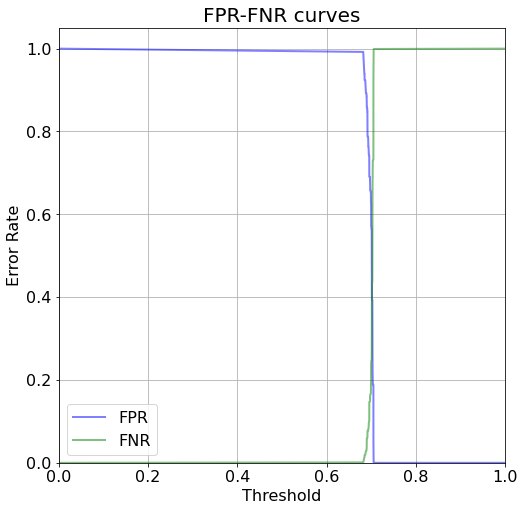

In [30]:
plt.figure(figsize=(8, 8))
lw = 2

plt.plot(thresholds, fpr, color='blue', lw=lw, label='FPR', alpha=0.5)
plt.plot(thresholds, fnr, color='green', lw=lw, label='FNR', alpha=0.5)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.xlabel('Threshold', fontsize=16)
plt.ylabel('Error Rate', fontsize=16)
plt.title('FPR-FNR curves', fontsize=20)
plt.legend(loc="lower left", fontsize=16)
plt.show()

In [31]:
from catboost.utils import select_threshold

print(select_threshold(model=model, data=eval_pool, FNR=0.01))
print(select_threshold(model=model, data=eval_pool, FPR=0.01))

0.6837656016853847
0.705526243233672


# Предсказания модели

In [34]:
print(model.predict_proba(X_validation))

[[0.298  0.702 ]
 [0.3001 0.6999]
 [0.3023 0.6977]
 ...
 [0.3042 0.6958]
 [0.295  0.705 ]
 [0.3059 0.6941]]


In [35]:
print(model.predict(X_validation))

[1 1 1 ... 1 1 1]


In [36]:
raw_pred = model.predict(
    data=X_validation,
    prediction_type='RawFormulaVal'
)
print(raw_pred)

[0.8568 0.8466 0.8365 ... 0.8273 0.8712 0.8195]


In [37]:
from numpy import exp

sigmoid = lambda x: 1 / (1 + exp(-x))

probabilities = sigmoid(raw_pred)

print(probabilities)

[0.702  0.6999 0.6977 ... 0.6958 0.705  0.6941]


# Последовательные предсказания

In [38]:
predictions_gen = model.staged_predict_proba(
    data=X_validation,
    ntree_start=0, 
    ntree_end=5, 
    eval_period=1
)
try:
    for iteration, predictions in enumerate(predictions_gen):
        print('Iteration ' + str(iteration) + ', predictions:')
        print(predictions)
except Exception:
    pass

Iteration 0, predictions:
[[0.4867 0.5133]
 [0.4867 0.5133]
 [0.4867 0.5133]
 ...
 [0.4867 0.5133]
 [0.4867 0.5133]
 [0.4867 0.5133]]
Iteration 1, predictions:
[[0.4739 0.5261]
 [0.4739 0.5261]
 [0.4739 0.5261]
 ...
 [0.4739 0.5261]
 [0.4739 0.5261]
 [0.4739 0.5261]]
Iteration 2, predictions:
[[0.4612 0.5388]
 [0.4612 0.5388]
 [0.4626 0.5374]
 ...
 [0.4626 0.5374]
 [0.4612 0.5388]
 [0.4626 0.5374]]
Iteration 3, predictions:
[[0.4491 0.5509]
 [0.4491 0.5509]
 [0.4506 0.5494]
 ...
 [0.4506 0.5494]
 [0.4491 0.5509]
 [0.4506 0.5494]]
Iteration 4, predictions:
[[0.4378 0.5622]
 [0.4378 0.5622]
 [0.4387 0.5613]
 ...
 [0.4393 0.5607]
 [0.4372 0.5628]
 [0.4393 0.5607]]


# Многоклассовая классификация

In [39]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=50,
    random_seed=43,
    loss_function='MultiClass'
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

# Важность признаков

In [40]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,MGR_ID,31.659932
1,RESOURCE,17.171955
2,ROLE_FAMILY_DESC,12.332457
3,ROLE_DEPTNAME,10.864216
4,ROLE_CODE,8.994698
5,ROLE_ROLLUP_2,8.847865
6,ROLE_ROLLUP_1,5.537394
7,ROLE_TITLE,2.484312
8,ROLE_FAMILY,2.107171


# Сохранение модели

In [41]:
my_best_model = CatBoostClassifier(iterations=10)
my_best_model.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    cat_features=cat_features,
    verbose=False
)
my_best_model.save_model('catboost_model.bin')
my_best_model.save_model('catboost_model.json', format='json')

In [42]:
my_best_model.load_model('catboost_model.bin')
print(my_best_model.get_params())
print(my_best_model.random_seed_)

{'iterations': 10, 'loss_function': 'Logloss', 'verbose': 0}
0


# Настройка гиперпараметров

## Скорость обучения

In [43]:
from catboost import CatBoost
fast_model = CatBoostClassifier(
    random_seed=63,
    iterations=150,
    learning_rate=0.01,
    boosting_type='Plain',
    bootstrap_type='Bernoulli',
    subsample=0.5,
    one_hot_max_size=20,
    rsm=0.5,
    leaf_estimation_iterations=5,
    max_ctr_complexity=1)

fast_model.fit(
    X_train, y_train,
    cat_features=cat_features,
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

# Точность

In [44]:
tunned_model = CatBoostClassifier(
    random_seed=63,
    iterations=1000,
    learning_rate=0.03,
    l2_leaf_reg=3,
    bagging_temperature=1,
    random_strength=1,
    one_hot_max_size=2,
    leaf_estimation_method='Newton'
)
tunned_model.fit(
    X_train, y_train,
    cat_features=cat_features,
    verbose=False,
    eval_set=(X_validation, y_validation),
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

# Задание

1) Решите задачу с данными train_medium.csv, test_medium.csv с помощью CatBoost. Найдите оптимальные параметры. Сравните скорость обучения и качество с результатами xgboost.

2) Выполните пункт 1) для LightGBM. 

In [45]:
X_train = pd.read_csv('train_small.csv')
X_test = pd.read_csv('test_small.csv')

ytrain = X_train['Disbursed']
Xtrain = X_train.copy()
del Xtrain['Disbursed']

ytest = X_test['Disbursed']
Xtest = X_test.copy()
del Xtest['Disbursed']

In [24]:
#your code here

0:	learn: 0.6113154	total: 113ms	remaining: 1m 53s
1:	learn: 0.5367929	total: 194ms	remaining: 1m 36s
2:	learn: 0.4756459	total: 268ms	remaining: 1m 29s
3:	learn: 0.4197119	total: 342ms	remaining: 1m 25s
4:	learn: 0.3737361	total: 407ms	remaining: 1m 21s
5:	learn: 0.3340686	total: 487ms	remaining: 1m 20s
6:	learn: 0.2980078	total: 571ms	remaining: 1m 21s
7:	learn: 0.2688943	total: 637ms	remaining: 1m 18s
8:	learn: 0.2447650	total: 697ms	remaining: 1m 16s
9:	learn: 0.2235932	total: 772ms	remaining: 1m 16s
10:	learn: 0.2046964	total: 824ms	remaining: 1m 14s
11:	learn: 0.1884799	total: 898ms	remaining: 1m 13s
12:	learn: 0.1746336	total: 957ms	remaining: 1m 12s
13:	learn: 0.1618113	total: 1s	remaining: 1m 10s
14:	learn: 0.1515570	total: 1.07s	remaining: 1m 10s
15:	learn: 0.1424975	total: 1.16s	remaining: 1m 11s
16:	learn: 0.1345491	total: 1.24s	remaining: 1m 11s
17:	learn: 0.1277615	total: 1.31s	remaining: 1m 11s
18:	learn: 0.1202118	total: 1.38s	remaining: 1m 11s
19:	learn: 0.1136042	tota

162:	learn: 0.0623695	total: 11.7s	remaining: 1m
163:	learn: 0.0622537	total: 11.8s	remaining: 1m
164:	learn: 0.0622041	total: 11.9s	remaining: 1m
165:	learn: 0.0621821	total: 12s	remaining: 1m
166:	learn: 0.0621472	total: 12s	remaining: 1m
167:	learn: 0.0621221	total: 12.1s	remaining: 60s
168:	learn: 0.0620873	total: 12.2s	remaining: 59.9s
169:	learn: 0.0620647	total: 12.3s	remaining: 59.9s
170:	learn: 0.0620446	total: 12.3s	remaining: 59.8s
171:	learn: 0.0620150	total: 12.4s	remaining: 59.7s
172:	learn: 0.0619586	total: 12.5s	remaining: 59.7s
173:	learn: 0.0619509	total: 12.6s	remaining: 59.6s
174:	learn: 0.0619355	total: 12.6s	remaining: 59.6s
175:	learn: 0.0619191	total: 12.7s	remaining: 59.5s
176:	learn: 0.0619038	total: 12.8s	remaining: 59.4s
177:	learn: 0.0618516	total: 12.9s	remaining: 59.4s
178:	learn: 0.0618265	total: 13s	remaining: 59.4s
179:	learn: 0.0617944	total: 13s	remaining: 59.4s
180:	learn: 0.0617565	total: 13.1s	remaining: 59.3s
181:	learn: 0.0616482	total: 13.2s	re

323:	learn: 0.0570203	total: 23.7s	remaining: 49.5s
324:	learn: 0.0569765	total: 23.8s	remaining: 49.4s
325:	learn: 0.0569446	total: 23.9s	remaining: 49.3s
326:	learn: 0.0568961	total: 23.9s	remaining: 49.2s
327:	learn: 0.0568908	total: 24s	remaining: 49.2s
328:	learn: 0.0568651	total: 24.1s	remaining: 49.1s
329:	learn: 0.0568648	total: 24.1s	remaining: 49s
330:	learn: 0.0568313	total: 24.2s	remaining: 48.9s
331:	learn: 0.0567728	total: 24.3s	remaining: 48.8s
332:	learn: 0.0567497	total: 24.4s	remaining: 48.8s
333:	learn: 0.0567109	total: 24.4s	remaining: 48.7s
334:	learn: 0.0566492	total: 24.5s	remaining: 48.6s
335:	learn: 0.0566170	total: 24.6s	remaining: 48.6s
336:	learn: 0.0565783	total: 24.6s	remaining: 48.5s
337:	learn: 0.0565615	total: 24.7s	remaining: 48.4s
338:	learn: 0.0565342	total: 24.8s	remaining: 48.3s
339:	learn: 0.0565009	total: 24.9s	remaining: 48.2s
340:	learn: 0.0564574	total: 24.9s	remaining: 48.2s
341:	learn: 0.0564426	total: 25s	remaining: 48.1s
342:	learn: 0.0564

483:	learn: 0.0524637	total: 35.7s	remaining: 38.1s
484:	learn: 0.0524526	total: 35.8s	remaining: 38s
485:	learn: 0.0524183	total: 35.8s	remaining: 37.9s
486:	learn: 0.0523332	total: 35.9s	remaining: 37.8s
487:	learn: 0.0522913	total: 36s	remaining: 37.8s
488:	learn: 0.0522739	total: 36.1s	remaining: 37.7s
489:	learn: 0.0522405	total: 36.1s	remaining: 37.6s
490:	learn: 0.0522226	total: 36.2s	remaining: 37.5s
491:	learn: 0.0521958	total: 36.3s	remaining: 37.5s
492:	learn: 0.0521752	total: 36.4s	remaining: 37.4s
493:	learn: 0.0521395	total: 36.4s	remaining: 37.3s
494:	learn: 0.0521030	total: 36.5s	remaining: 37.2s
495:	learn: 0.0520806	total: 36.6s	remaining: 37.2s
496:	learn: 0.0520579	total: 36.7s	remaining: 37.1s
497:	learn: 0.0520527	total: 36.7s	remaining: 37s
498:	learn: 0.0520458	total: 36.8s	remaining: 37s
499:	learn: 0.0520443	total: 36.9s	remaining: 36.9s
500:	learn: 0.0520415	total: 36.9s	remaining: 36.8s
501:	learn: 0.0520096	total: 37s	remaining: 36.7s
502:	learn: 0.0519666	

642:	learn: 0.0493031	total: 47.6s	remaining: 26.4s
643:	learn: 0.0492933	total: 47.6s	remaining: 26.3s
644:	learn: 0.0492807	total: 47.7s	remaining: 26.3s
645:	learn: 0.0492488	total: 47.8s	remaining: 26.2s
646:	learn: 0.0492448	total: 47.8s	remaining: 26.1s
647:	learn: 0.0492056	total: 47.9s	remaining: 26s
648:	learn: 0.0491722	total: 48s	remaining: 26s
649:	learn: 0.0491683	total: 48.1s	remaining: 25.9s
650:	learn: 0.0491604	total: 48.2s	remaining: 25.8s
651:	learn: 0.0491591	total: 48.2s	remaining: 25.7s
652:	learn: 0.0491553	total: 48.3s	remaining: 25.7s
653:	learn: 0.0491538	total: 48.4s	remaining: 25.6s
654:	learn: 0.0491241	total: 48.5s	remaining: 25.5s
655:	learn: 0.0490836	total: 48.6s	remaining: 25.5s
656:	learn: 0.0490676	total: 48.6s	remaining: 25.4s
657:	learn: 0.0490555	total: 48.7s	remaining: 25.3s
658:	learn: 0.0490360	total: 48.8s	remaining: 25.2s
659:	learn: 0.0490216	total: 48.9s	remaining: 25.2s
660:	learn: 0.0490058	total: 48.9s	remaining: 25.1s
661:	learn: 0.0489

801:	learn: 0.0469365	total: 59.5s	remaining: 14.7s
802:	learn: 0.0469175	total: 59.5s	remaining: 14.6s
803:	learn: 0.0469068	total: 59.6s	remaining: 14.5s
804:	learn: 0.0468963	total: 59.7s	remaining: 14.5s
805:	learn: 0.0468956	total: 59.8s	remaining: 14.4s
806:	learn: 0.0468939	total: 59.8s	remaining: 14.3s
807:	learn: 0.0468620	total: 59.9s	remaining: 14.2s
808:	learn: 0.0468615	total: 60s	remaining: 14.2s
809:	learn: 0.0468590	total: 1m	remaining: 14.1s
810:	learn: 0.0468569	total: 1m	remaining: 14s
811:	learn: 0.0468492	total: 1m	remaining: 13.9s
812:	learn: 0.0468450	total: 1m	remaining: 13.9s
813:	learn: 0.0468284	total: 1m	remaining: 13.8s
814:	learn: 0.0468134	total: 1m	remaining: 13.7s
815:	learn: 0.0468092	total: 1m	remaining: 13.6s
816:	learn: 0.0468054	total: 1m	remaining: 13.6s
817:	learn: 0.0467774	total: 1m	remaining: 13.5s
818:	learn: 0.0467545	total: 1m	remaining: 13.4s
819:	learn: 0.0467504	total: 1m	remaining: 13.3s
820:	learn: 0.0467083	total: 1m	remaining: 13.3s


960:	learn: 0.0450046	total: 1m 11s	remaining: 2.9s
961:	learn: 0.0450045	total: 1m 11s	remaining: 2.82s
962:	learn: 0.0449846	total: 1m 11s	remaining: 2.75s
963:	learn: 0.0449689	total: 1m 11s	remaining: 2.67s
964:	learn: 0.0449672	total: 1m 11s	remaining: 2.6s
965:	learn: 0.0449345	total: 1m 11s	remaining: 2.52s
966:	learn: 0.0449237	total: 1m 11s	remaining: 2.45s
967:	learn: 0.0449032	total: 1m 11s	remaining: 2.38s
968:	learn: 0.0449020	total: 1m 11s	remaining: 2.3s
969:	learn: 0.0448948	total: 1m 12s	remaining: 2.23s
970:	learn: 0.0448827	total: 1m 12s	remaining: 2.15s
971:	learn: 0.0448815	total: 1m 12s	remaining: 2.08s
972:	learn: 0.0448793	total: 1m 12s	remaining: 2s
973:	learn: 0.0448670	total: 1m 12s	remaining: 1.93s
974:	learn: 0.0448509	total: 1m 12s	remaining: 1.85s
975:	learn: 0.0448502	total: 1m 12s	remaining: 1.78s
976:	learn: 0.0448342	total: 1m 12s	remaining: 1.71s
977:	learn: 0.0448316	total: 1m 12s	remaining: 1.63s
978:	learn: 0.0447883	total: 1m 12s	remaining: 1.56s

# Задание

Решите задачу классификации пассажиров Титаника с помощью XGBoost, CatBoost,LightGBM. Если у вас есть наработки по Титанику, используйте их. Помните о том, что CatBoost сам умеет кодировать категориальные признаки, попробуйте использовать это.

Удалось ли улучшить качество с помощью какого-либо из этих алгоритмов?

In [3]:
import pandas as pd

df = pd.read_csv("titanic_train.csv")

#your code here